# WEEK 6 - Segment wise insights


In [1]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("preprocessed_kids_screen_time.csv")
df.head(7)

,Age,Age_group,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Device_Type,Screen_Size,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Health_Status,Urban_or_Rural
0,14,Teenagers,Male,3.99,Smartphone,Portable,<30,True,0.42,"Poor Sleep, Eye Strain","Mental, Physical",Urban
1,11,Pre-Teens,Female,4.61,Laptop,Portable,<30,True,0.30,Poor Sleep,Mental,Urban
2,18,Late Teens,Female,3.73,TV,Fixed,>=30,True,0.32,Poor Sleep,Mental,Urban
3,15,Teenagers,Female,1.21,Laptop,Portable,<30,False,0.39,No Health Impacts,No Health Impacts,Urban
4,12,Pre-Teens,Female,5.89,Smartphone,Portable,<30,True,0.49,"Poor Sleep, Anxiety",Mental,Urban
5,14,Teenagers,Female,4.88,Smartphone,Portable,<30,True,0.44,Poor Sleep,Mental,Urban
6,17,Late Teens,Male,2.97,TV,Fixed,>=30,False,0.48,No Health Impacts,No Health Impacts,Rural


In [44]:
# Average screen time across key segments
seg_summary = df.groupby(['Age_group', 'Primary_Device'])['Avg_Daily_Screen_Time_hr'].agg(['mean','median','count']).reset_index()
seg_summary = seg_summary.sort_values('mean', ascending=False)
display(seg_summary.head(7))

,Age_group,Primary_Device,mean,median,count
10,Teenagers,TV,4.586816,4.620,735
3,Late Teens,Tablet,4.555843,4.565,166
0,Late Teens,Laptop,4.548735,4.665,340
1,Late Teens,Smartphone,4.539220,4.530,885
9,Teenagers,Smartphone,4.507969,4.520,1758
2,Late Teens,TV,4.477568,4.500,366
11,Teenagers,Tablet,4.461235,4.470,340


In [23]:
# Age Group × Gender
df.groupby(['Age_group', 'Gender'])['Avg_Daily_Screen_Time_hr'].mean()

# Device Type × Age Group
df.groupby(['Device_Type', 'Age_group'])['Avg_Daily_Screen_Time_hr'].mean()

# Health Status × Age Group
df.groupby(['Health_Status', 'Age_group'])['Avg_Daily_Screen_Time_hr'].mean()

# Urban/Rural × Device Type
df.groupby(['Urban_or_Rural', 'Device_Type'])['Avg_Daily_Screen_Time_hr'].mean()

Urban_or_Rural  Device_Type
Rural           Fixed          4.299583
                Portable       4.402408
Urban           Fixed          4.299527
                Portable       4.386671
Name: Avg_Daily_Screen_Time_hr, dtype: float64

In [24]:
# Mean screen time by each health status
df.groupby('Health_Status')['Avg_Daily_Screen_Time_hr'].mean()

# Compare mental vs. no health impacts
df.pivot_table(index='Health_Status', values='Avg_Daily_Screen_Time_hr', aggfunc='mean')

,Avg_Daily_Screen_Time_hr
Health_Status,
Mental,4.941345
"Mental, Physical",4.914466
No Health Impacts,3.245264
Physical,4.849780


In [25]:
# Standard deviation (variability)
df.groupby('Age_group')['Avg_Daily_Screen_Time_hr'].agg(['mean', 'std', 'min', 'max']

,mean,std,min,max
Age_group,,,,
Late Teens,4.529789,1.214399,0.00,8.27
Pre-Teens,4.193420,2.150401,0.00,13.89
Teenagers,4.502399,1.189260,0.16,8.74


In [40]:
corr_table = df.corr(numeric_only=True).round(2)
corr_table

,Age,Avg_Daily_Screen_Time_hr,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio
Age,1.00,0.11,0.15,-0.49
Avg_Daily_Screen_Time_hr,0.11,1.00,0.66,-0.08
Exceeded_Recommended_Limit,0.15,0.66,1.00,-0.12
Educational_to_Recreational_Ratio,-0.49,-0.08,-0.12,1.00


In [46]:
variance_table = (
    df.groupby('Device_Type')['Avg_Daily_Screen_Time_hr']
    .agg(['mean', 'std'])
    .assign(Variance_Index=lambda x: (x['std'] / x['mean']).round(2))
)
variance_table

,mean,std,Variance_Index
Device_Type,,,
Fixed,4.299544,1.914434,0.45
Portable,4.391298,1.623247,0.37


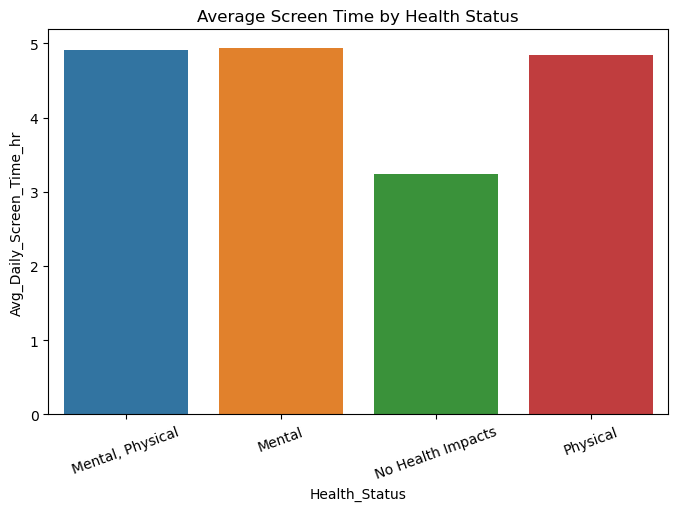

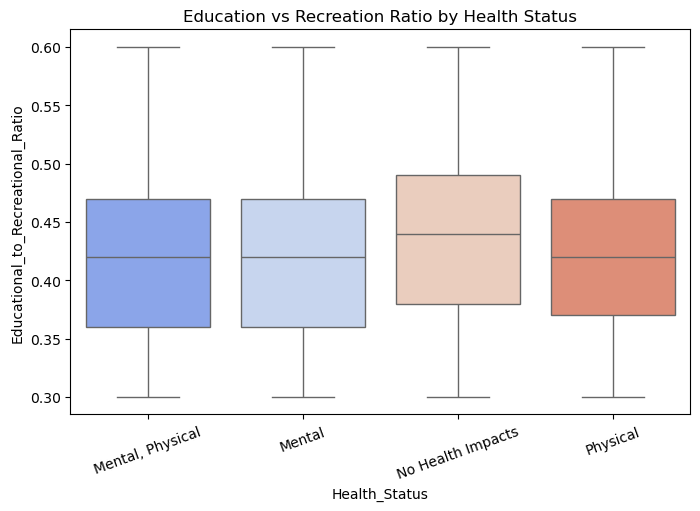

 Insight:
People with mental or physical health issues have the highest screen time (~4.9 hrs).
High exposure correlates with reduced physical activity and mental fatigue, suggesting an unhealthy screen-use pattern.



In [47]:
# Health Status vs Screen Time

plt.figure(figsize=(8,5))
sns.barplot(x="Health_Status", y="Avg_Daily_Screen_Time_hr", hue="Health_Status", data=df, errorbar=None)
plt.title("Average Screen Time by Health Status")
plt.xticks(rotation=20)
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x="Health_Status", y="Educational_to_Recreational_Ratio",hue="Health_Status", data=df, palette="coolwarm")
plt.title("Education vs Recreation Ratio by Health Status")
plt.xticks(rotation=20)
plt.show()

print(" Insight:")
print("People with mental or physical health issues have the highest screen time (~4.9 hrs).")
print("High exposure correlates with reduced physical activity and mental fatigue, suggesting an unhealthy screen-use pattern.\n")

In [35]:
insight_table = pd.DataFrame({
    "Segment": ["Age Group", "Gender", "Device Type", "Health Status", "Urban/Rural"],
    "Key Finding": [
        "Late Teens have the highest screen time (4.53 hr)",
        "Males and Females show minimal difference",
        "Portable devices lead over Fixed devices",
        "Mental health groups record highest averages",
        "Urban and Rural averages nearly identical"
    ]
})
insight_table

,Segment,Key Finding
0,Age Group,Late Teens have the highest screen time (4.53 hr)
1,Gender,Males and Females show minimal difference
2,Device Type,Portable devices lead over Fixed devices
3,Health Status,Mental health groups record highest averages
4,Urban/Rural,Urban and Rural averages nearly identical
